In [1]:

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
import math

warnings.filterwarnings("ignore")

Read the data
===========

In [2]:
# x_original=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
# y_original=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

# x_original=x_original[['Unnamed: 0','L100800', 'L104600', 'S000300', 'SEX', 'S000501', 'L101700',
#        'L190400', 'S000502', 'L190500', 'L101300', 'AGE', 'FIELD_38',
#        'FIELD_31', 'FIELD_41'
#                       ]]

# y_original=y_original[['Unnamed: 0','L100800' ]]


# print(x_original.shape)
# print(y_original.shape)

In [3]:
# for index,col in enumerate(x_original.columns):
#     print(col,x_original[col].dropna().shape[0])

Prepare the data
============

In [4]:
data = pd.read_csv("../../sep19SexAndAgeAddedFINAL DATASET_ver2.txt", sep=",")
data["max"] = np.min(data[["FIELD_6", "FIELD_7"]], axis=1)
data = data.drop(columns=["FIELD_6", "FIELD_7"])

# change field 38 to 3 group
condtion = [
    data.FIELD_38 == 0,
    (data.FIELD_38 > 0) & (data.FIELD_38 < 4),
    data.FIELD_38 >= 4,
]
choice = [0, 1, 2]
data["FIELD_38_C"] = np.select(condtion, choice, default=np.nan)

data = data[
    [
        "L190300",
        "S000300",
        "FIELD_38",
        "AGE",
        "L100700",
        "L100800",
        "FIELD_33",
        "FIELD_41",
        "FIELD_42",
        "L190500",
        "L101600",
        "L103100",
        "L103000",
        "S000502",
        'S000501'
    ]
]
data = data.dropna().reset_index()

# data=data[data.FIELD_15==0]
# data=data[data.FIELD_22==0]
# data=data[data.SEX==0]
# data=data[data.AGE < 40]

print(data.shape)

(461865, 16)


In [5]:
print(data.shape)
print(data.columns)
data.head()

(461865, 16)
Index(['index', 'L190300', 'S000300', 'FIELD_38', 'AGE', 'L100700', 'L100800',
       'FIELD_33', 'FIELD_41', 'FIELD_42', 'L190500', 'L101600', 'L103100',
       'L103000', 'S000502', 'S000501'],
      dtype='object')


,index,L190300,S000300,FIELD_38,AGE,L100700,L100800,FIELD_33,FIELD_41,FIELD_42,L190500,L101600,L103100,L103000,S000502,S000501
0,0,3.76,22.6,2.0,46.0,2.6,111.0,2.0,7.0,7.0,35.4,48.0,73.0,70.0,80.0,130.0
1,1,4.02,22.9,2.0,47.0,3.7,103.0,2.0,4.0,5.0,38.2,49.0,79.0,50.0,83.0,132.0
2,2,4.24,24.3,3.0,48.0,2.6,113.0,2.0,3.0,3.0,40.7,42.0,65.0,75.0,85.0,132.0
3,3,4.28,24.3,2.0,49.0,2.0,105.0,2.0,0.0,0.0,41.1,53.0,62.0,130.0,80.0,140.0
4,4,4.34,23.7,3.0,50.0,2.8,118.0,2.0,2.0,2.0,40.4,49.0,61.0,92.0,90.0,145.0


In [6]:
# test = pd.read_csv("test.txt")
# testpd = data[data.index.isin(list(test[["Unnamed: 0"]].values.astype(int).ravel()))]

# train = pd.read_csv("train.txt")
# trainpd = data[
#     data.index.isin(list(train[["Unnamed: 0"]].values.astype(int).ravel()))
# ]

# # list(xtest[["Unnamed: 0"]].values.astype(int).ravel())


In [7]:
x = data[
    [
        'S000501',
        "L190300",
        "S000300",
        "FIELD_38",
        "AGE",
        "L100700",
        "L100800",
        "FIELD_33",
        "FIELD_41",
        "FIELD_42",
        "L190500",
        "L101600",
        "L103100",
        "L103000",
    ]
]

y = data[["S000502"]]

In [8]:
# histogram plot of the features
# import matplotlib.pyplot as plt
# x[x.dtypes[(x.dtypes=="float64")|(x.dtypes=="int64")]
#                         .index.values].hist(figsize=[11,11])

Apply PCA
===========

In [9]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# pca.fit(x)

# print(pca.explained_variance_ratio_)
# print(np.sum(pca.explained_variance_ratio_))

# x=pca.fit_transform(x)
# print(x.shape)

feature scaling
=======

In [10]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()  #StandardScaler()
# x = min_max_scaler.fit_transform(x)

clustring test
==========

In [11]:
# from sklearn.cluster import KMeans
# from scipy.spatial.distance import cdist

# K = range(1,10)
# distortions = []

# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(x)
#     kmeanModel.fit(x)
#     distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# # Plot the elbow
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

In [12]:
# kmeanModel = KMeans(n_clusters=k).fit(x)
# x['lbl']=kmeanModel.labels_

Random Forest Regressor
=============

In [13]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import model_from_json
from keras.utils import multi_gpu_model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [14]:
ylable = y[["S000502"]]
xtrain, xtest, ytrain, ytest = train_test_split(
    x, ylable, random_state=42, test_size=0.2
)

In [15]:
# xtrain= trainpd[["L190300",
#         "S000300",
#         "FIELD_38",
#         "AGE",
#         "L100700",
#         "L100800",
#         "FIELD_33",
#         "FIELD_41",
#         "FIELD_42",
#         "L190500",
#         "L101600",
#         "L103100",
#         "L103000",]]
# ytrain=trainpd[["S000502"]] 

# xtest=testpd[["L190300",
#         "S000300",
#         "FIELD_38",
#         "AGE",
#         "L100700",
#         "L100800",
#         "FIELD_33",
#         "FIELD_41",
#         "FIELD_42",
#         "L190500",
#         "L101600",
#         "L103100",
#         "L103000",]]
# ytest= testpd[["S000502"]] 

In [16]:
# xtrain = pd.read_csv("../S000501 - regression/xtrain.txt")[
#     [
#         "L190300",
#         "S000300",
#         "FIELD_38",
#         "AGE",
#         "L100700",
#         "L100800",
#         "FIELD_33",
#         "FIELD_41",
#         "FIELD_42",
#         "L190500",
#         "L101600",
#         "L103100",
#         "L103000",
#     ]
# ]
# xtest = pd.read_csv("../S000501 - regression/xtest.txt")[
#     [
#         "L190300",
#         "S000300",
#         "FIELD_38",
#         "AGE",
#         "L100700",
#         "L100800",
#         "FIELD_33",
#         "FIELD_41",
#         "FIELD_42",
#         "L190500",
#         "L101600",
#         "L103100",
#         "L103000",
#     ]
# ]

# ytrain = y[
#     y.index.isin(pd.read_csv("../S000501 - regression/ytrain.txt")["Unnamed: 0"])
# ]
# ytest = y[y.index.isin(pd.read_csv("../S000501 - regression/ytest.txt")["Unnamed: 0"])]

In [17]:
print(ytest.shape)
print(ytrain.shape)

(92373, 1)
(369492, 1)


In [18]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=7, random_state=0, verbose=0, n_estimators=100)
regr.fit(xtrain, ytrain)
print(regr.feature_importances_)
ypred = regr.predict(xtest)

[9.59372707e-01 1.65007762e-03 4.27305238e-03 2.90223167e-04
 2.49541982e-02 6.37694859e-04 9.38064838e-05 1.35166690e-05
 1.12980673e-04 6.80148994e-06 5.78104930e-03 7.43444567e-05
 7.16986965e-04 2.02256103e-03]


mean_squared_error 32.93300067170677
root mean_squared_error 5.738728140599341
mean_absolute_error 4.520459169687292
r2_score 0.6167747777072845


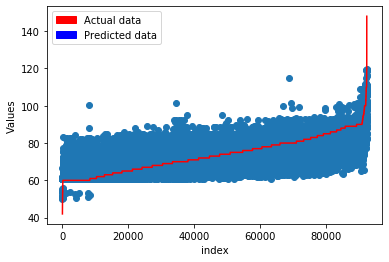

,t + 1,pred (t +1)
77603,120.0,109.430850
59408,122.0,102.631663
89392,123.0,110.190693
16652,124.0,109.740170
85141,127.0,116.479059
84197,130.0,119.200733
83431,130.0,101.013462
43814,136.0,109.269548
23388,139.0,119.224630
14621,148.0,119.589692


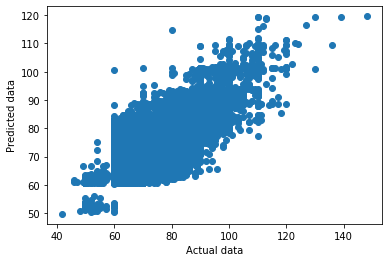

In [19]:
import math
from sklearn import metrics as m

print("mean_squared_error", m.mean_squared_error(ytest, ypred))
print("root mean_squared_error", math.sqrt(m.mean_squared_error(ytest, ypred)))
print("mean_absolute_error", m.mean_absolute_error(ytest, ypred))
print("r2_score", m.r2_score(ytest, ypred))

ypredPD = pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD["t + 1"] = ytest.values.ravel()
ypredPD["pred (t +1)"] = ypred
ypredPD.head(30)

import matplotlib.patches as mpatches

plt.ylabel("Values")
plt.xlabel("index")
red_patch = mpatches.Patch(color="red", label="Actual data")
blue_patch = mpatches.Patch(color="blue", label="Predicted data")
plt.legend(handles=[red_patch, blue_patch])

ypredPD = ypredPD.sort_values(by=["t + 1"])
plt.scatter(
    np.arange(0, ypredPD.shape[0], 1), ypredPD["pred (t +1)"][: ypredPD.shape[0]]
)
plt.plot(
    np.arange(0, ypredPD.shape[0], 1), ypredPD["t + 1"][: ypredPD.shape[0]], color="red"
)
plt.show()

plt.ylabel("Predicted data")
plt.xlabel("Actual data")
plt.scatter(
    ypredPD["t + 1"][: ypredPD.shape[0]], ypredPD["pred (t +1)"][: ypredPD.shape[0]]
)

ypredPD.tail(10)

In [20]:
ypredPD = pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD["t + 1"] = ytest.values.ravel()
ypredPD["pred (t +1)"] = ypred
ypredPD.head(10)

ypredPD["diff"] = abs(ypredPD["t + 1"] - ypredPD["pred (t +1)"])
ypredPD["diff"] = abs(ypredPD["t + 1"] - ypredPD["pred (t +1)"])
print("|Actual - predicted < 5 mmHg|", "{:.1f}%".format(100 * ypredPD[ypredPD["diff"] < 5].shape[0] / ypredPD.shape[0]))
print("|Actual - predicted < 10 mmHg|", "{:.1f}%".format(100 * ypredPD[ypredPD["diff"] < 10].shape[0] / ypredPD.shape[0]))
print("|Actual - predicted < 15 mmHg|", "{:.1f}%".format(100 * ypredPD[ypredPD["diff"] < 15].shape[0] / ypredPD.shape[0]))
print("|Actual - predicted < 20 mmHg|", "{:.1f}%".format(100 * ypredPD[ypredPD["diff"] < 20].shape[0] / ypredPD.shape[0]))
print("|Actual - predicted < 25 mmHg|", "{:.1f}%".format(100 * ypredPD[ypredPD["diff"] < 25].shape[0] / ypredPD.shape[0]))
print("|Actual - predicted < 30 mmHg|", "{:.1f}%".format(100 * ypredPD[ypredPD["diff"] < 30].shape[0] / ypredPD.shape[0]))

|Actual - predicted < 5 mmHg| 63.4%
|Actual - predicted < 10 mmHg| 92.0%
|Actual - predicted < 15 mmHg| 98.7%
|Actual - predicted < 20 mmHg| 99.8%
|Actual - predicted < 25 mmHg| 100.0%
|Actual - predicted < 30 mmHg| 100.0%


In [21]:
# pd.DataFrame(ypred,ytest.index.ravel()).to_csv("ypred_s000502.txt", sep=",")


xg boost
==========

In [22]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor()
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3,
#                           learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(xtrain, ytrain)

[01:11:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [23]:
ypred = xg_reg.predict(xtest)

print("mean_squared_error", m.mean_squared_error(ytest, ypred))
print("root mean_squared_error", math.sqrt(m.mean_squared_error(ytest, ypred)))
print("mean_absolute_error", m.mean_absolute_error(ytest, ypred))
print("r2_score", m.r2_score(ytest, ypred))

ypredPD = pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD["t + 1"] = ytest.values.ravel()
ypredPD["pred (t +1)"] = ypred
ypredPD.head(10)

mean_squared_error 32.441188190717185
root mean_squared_error 5.695716652952215
mean_absolute_error 4.490355712420504
r2_score 0.6224977590181096


,t + 1,pred (t +1)
0,80.0,84.163300
1,61.0,79.538170
2,77.0,81.601349
3,90.0,82.496086
4,60.0,60.799484
5,71.0,78.060753
6,60.0,61.542751
7,80.0,83.049416
8,80.0,77.120995
9,72.0,75.901535


In [24]:
ypredPD["diff"] = abs(ypredPD["t + 1"] - ypredPD["pred (t +1)"])
print("|Actual - predicted < 5 mmHg|", "{:.1f}%".format(100 * ypredPD[ypredPD["diff"] < 5].shape[0] / ypredPD.shape[0]))
print("|Actual - predicted < 10 mmHg|", "{:.1f}%".format(100 * ypredPD[ypredPD["diff"] < 10].shape[0] / ypredPD.shape[0]))
print("|Actual - predicted < 15 mmHg|", "{:.1f}%".format(100 * ypredPD[ypredPD["diff"] < 15].shape[0] / ypredPD.shape[0]))
print("|Actual - predicted < 20 mmHg|", "{:.1f}%".format(100 * ypredPD[ypredPD["diff"] < 20].shape[0] / ypredPD.shape[0]))
print("|Actual - predicted < 25 mmHg|", "{:.1f}%".format(100 * ypredPD[ypredPD["diff"] < 25].shape[0] / ypredPD.shape[0]))
print("|Actual - predicted < 30 mmHg|", "{:.1f}%".format(100 * ypredPD[ypredPD["diff"] < 30].shape[0] / ypredPD.shape[0]))

|Actual - predicted < 5 mmHg| 63.6%
|Actual - predicted < 10 mmHg| 92.3%
|Actual - predicted < 15 mmHg| 98.8%
|Actual - predicted < 20 mmHg| 99.8%
|Actual - predicted < 25 mmHg| 100.0%
|Actual - predicted < 30 mmHg| 100.0%


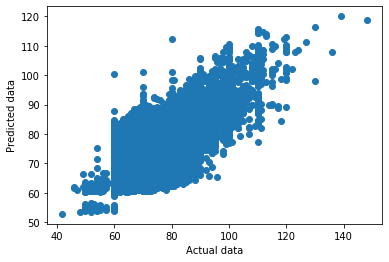

In [25]:
# pd.DataFrame(ypred).to_csv("ypred_s000502.txt", sep=",")
plt.ylabel("Predicted data")
plt.xlabel("Actual data")
plt.scatter(
    ypredPD["t + 1"][: ypredPD.shape[0]], ypredPD["pred (t +1)"][: ypredPD.shape[0]]
)

ANN
==========

In [ ]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import model_from_json
from keras.utils import multi_gpu_model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
model = Sequential()
model.add(
    Dense(input_dim=25, units=128, activation="relu", kernel_initializer="uniform")
)
model.add(Dense(units=128, activation="relu", kernel_initializer="uniform"))
model.add(RBFLayer(128, 0.5))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units=64, activation="relu", kernel_initializer="uniform"))
model.add(RBFLayer(64, 0.5))
model.add(Dense(units=32, activation="relu", kernel_initializer="uniform"))
model.add(RBFLayer(32, 0.5))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units=16, activation="relu", kernel_initializer="uniform"))
model.add(RBFLayer(16, 0.5))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units=8, activation="relu", kernel_initializer="uniform"))
model.add(RBFLayer(8, 0.5))
model.add(Dense(units=1, kernel_initializer="uniform"))
model.compile(
    loss="mean_squared_error", optimizer="Nadam", metrics=["mean_squared_error"]
)

In [ ]:
h = model.fit(xtrain, ytrain, validation_split=0.2, epochs=20, batch_size=50)

In [ ]:
ypred = model.predict(xtest)

import math

print("mean_squared_error", m.mean_squared_error(ytest, ypred))
print("root mean_squared_error", math.sqrt(m.mean_squared_error(ytest, ypred)))
print("mean_absolute_error", m.mean_absolute_error(ytest, ypred))
print("r2_score", m.r2_score(ytest, ypred))

ypredPD = pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD["t + 1"] = ytest.values.ravel()
ypredPD["pred (t +1)"] = ypred
ypredPD.head(10)

In [ ]:
history = h
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()
# summarize history for loss
plt.plot(history.history["val_mean_squared_error"])
plt.plot(history.history["mean_squared_error"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
ypredPD["diff"] = abs(ypredPD["t + 1"] - ypredPD["pred (t +1)"])
print(np.mean(ypredPD["diff"]))
print(np.std(ypredPD["diff"]))
print(100 * ypredPD[ypredPD["diff"] <= 5].shape[0] / ypredPD.shape[0])

In [ ]:
import matplotlib.patches as mpatches

plt.ylabel("Values")
plt.xlabel("index")
red_patch = mpatches.Patch(color="red", label="Actual data")
blue_patch = mpatches.Patch(color="blue", label="Predicted data")
plt.legend(handles=[red_patch, blue_patch])

ypredPD = ypredPD.sort_values(by=["t + 1"])
plt.scatter(
    np.arange(0, ypredPD.shape[0], 1), ypredPD["pred (t +1)"][: ypredPD.shape[0]]
)
plt.plot(
    np.arange(0, ypredPD.shape[0], 1), ypredPD["t + 1"][: ypredPD.shape[0]], color="red"
)
plt.show()

plt.ylabel("p*(t+1), Predicted data")
plt.xlabel("p(t+1), Actual data")
plt.scatter(
    ypredPD["t + 1"][: ypredPD.shape[0]], ypredPD["pred (t +1)"][: ypredPD.shape[0]]
)

ypredPD.head(10)

SVR
======

In [ ]:
from sklearn.svm import SVR
# svr_rbf = SVR(kernel='rbf', C=10, gamma=0.02, epsilon=.001)
svr_rbf = SVR(kernel='rbf')

In [ ]:
svr_rbf.fit(xtrain, ytrain) 

In [ ]:
ypred=svr_rbf.predict(xtest)

In [ ]:
import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

In [ ]:
from keras.layers import Layer
from keras import backend as K


class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(
            name="mu",
            shape=(int(input_shape[1]), self.units),
            initializer="uniform",
            trainable=True,
        )
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)